<a href="https://colab.research.google.com/github/HongSeongMo/Bigdata_Analysis_Professional/blob/main/Test_241120.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/Ionosphere.csv', index_col=0)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


In [4]:
df = data.dropna()
x = (df.loc[:, (df.columns != 'V1') & (df.columns != 'V2') & (df.columns != 'Class')]).to_numpy()
df['Class'] = df['Class'].map({'bad':0, 'good':1})
y = df['Class'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, random_state=55)
scaler = StandardScaler()
scaler.fit(trainx)
trainx_scale = scaler.transform(trainx)
testx_scale = scaler.transform(testx)
model = LogisticRegression(C=20, max_iter=1000)
results = model.fit(trainx_scale, trainy)
ypred = results.predict(testx_scale)
print('훈련집합에 대한 분류 성능(정확도, %): ', end=''); print(model.score(trainx_scale, trainy)*100)
print('검증집합에 대한 분류 성능(정확도, %): ', end=''); print(model.score(testx_scale, testy)*100)
print('분류 클래스: ', end=''); print(model.classes_)

훈련집합에 대한 분류 성능(정확도, %): 93.15589353612167
검증집합에 대한 분류 성능(정확도, %): 75.0
분류 클래스: [0 1]


In [5]:
print('각 속성별 게수(coefficients)'); print(model.coef_)
print('절편(intercept)'); print(model.intercept_)

각 속성별 게수(coefficients)
[[ 0.8852659   0.37672534  2.00042027  0.71175098  0.81073065  2.84586839
   3.1377051  -0.77087619 -2.03670545 -0.05997445 -1.83289156  1.2900374
   0.99396614 -0.80923945  0.92107032  0.75847359 -2.03575877  0.38698488
   0.74845449 -2.53240013  2.52672597  1.22132041  0.09206513  2.16185683
  -2.44445739 -0.39755879  1.04857133  0.17644129  1.29545223 -0.00840127
  -1.28442338 -1.66957409]]
절편(intercept)
[0.99920107]


In [6]:
conf = confusion_matrix(testy, ypred)
print(conf)

[[18 16]
 [ 6 48]]


In [7]:
print(classification_report(testy, ypred))

              precision    recall  f1-score   support

           0       0.75      0.53      0.62        34
           1       0.75      0.89      0.81        54

    accuracy                           0.75        88
   macro avg       0.75      0.71      0.72        88
weighted avg       0.75      0.75      0.74        88



In [8]:
print(f1_score(testy, ypred))

0.8135593220338984


In [9]:
print(accuracy_score(testy, ypred))

0.75


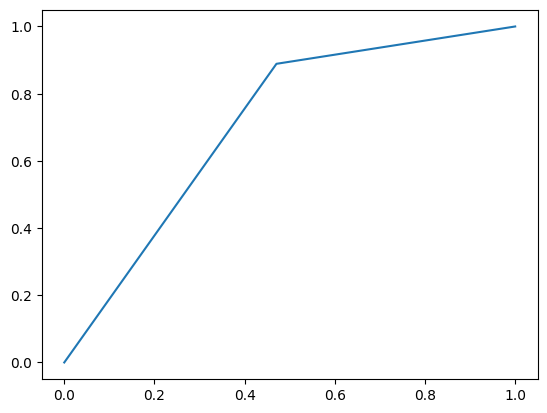

0.7091503267973855


In [11]:
fpr,tpr, thresholds = roc_curve(testy, ypred)
plt.plot(fpr, tpr);plt.show()
print(auc(fpr, tpr))